# Midterm Project : M.A.F.I.A. in the morning(3)
* * *

## 3. 메딕은 시민을 살립니다.
* 가장 단순한 게임에 메딕이 들어옵니다
    * 메딕은 매일 밤 한 사람을 골라서 살려줍니다
        * 마피아의 총에 맞은 사람을 지목하면 살리고
        * 아닌 사람을 지목하면 아무 일도 일어나지 않겠죠
* 이 경우 확률은 어떻게 변화할까요? 어떤 패턴이 있을까요?
    * 메딕도 시민입니다. 마피아가 밤에 죽일 수도 있습니다.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import random

### Code

- 기존 코드에서의 변경 내용을 표시

In [2]:
def job_Init(num, job, list):
    for i in range(0, num):
        list.append(job)

def people_Count(list):
    mafia=list.count("mafia")
    citizen=list.count("citizen")
    medic=list.count("medic")
    participant = mafia+citizen+medic
    return mafia, citizen, medic, participant

def modefinder(numbers): 
    c = Counter(numbers) 
    mode = c.most_common(1) 
    return mode[0][0]

- medic_Save(리스트, 인덱스) : 메딕이 살아있을 때, 랜덤하게 한 명을 지목하고 마피아의 지목과 곂칠 경우 True를 반환

In [3]:
def medic_Save(participants, kill):
    if participants.count("medic") == 0:
        return False
    save=random.randrange(0, len(participants))
    if save==kill:
        # print("save")
        return True
    return False

In [4]:
def day_Vote(participants):
    vote_list=list()
    mafia_count=participants.count("mafia")
    for i in range(0, len(participants)):
        if participants[i]=="mafia":
            vote=random.randrange(mafia_count, len(participants))
            vote_list.append(vote)
        else:
            vote=random.randrange(0, len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    del participants[max_vote]
    return participants

In [5]:
def night_Kill(participants):
    vote_list=list()
    mafia_count=participants.count("mafia")
    for i in range(0, mafia_count):
        if participants[i]=="mafia":
            vote=random.randrange(mafia_count, len(participants))
            vote_list.append(vote)
    max_vote=modefinder(vote_list)
    if medic_Save(participants, max_vote)==False:
        del participants[max_vote]
    return participants

In [6]:
def in_Game(participants):
    turn = "morning"
    mafia, citizen, medic, people = people_Count(participants)
    while (mafia > 0) & (people-mafia > mafia) == True:
        if turn == "morning":
            participants = day_Vote(participants)
            turn = "night"
        else:
            participants = night_Kill(participants)
            turn = "morning"
        mafia, citizen, medic, people = people_Count(participants)
        # print(participants)
    if mafia == 0:
        return True
    else:
        return False
    
# participants=["mafia", "citizen", "citizen","citizen","citizen","citizen", "citizen","citizen","citizen", "citizen", "medic"]
# in_Game(participants)

In [7]:
def citizen_win_Rate(participants):
    wincount = 0
    mafia=participants.count("mafia")
    citizen=participants.count("citizen")
    medic=participants.count("medic")
    times=100
    for i in range(0,times):
        participants=list()
        job_Init(mafia, "mafia", participants)
        job_Init(citizen, "citizen", participants)
        job_Init(medic, "medic", participants)
        if in_Game(participants) == True:
            wincount += 1
    return 100*wincount/times

In [8]:
def Mafia_Game_withMedic_Stats(num_mafia, num_citizen, num_medic):
    mafia = num_mafia
    citizen = num_citizen
    medic = num_medic
    citizen_win_list=list()
    for i in range (0, 100):
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(medic, "medic", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

#Mafia_Game_withMedic_Stats(2,7,0)

In [9]:
def Mafia_Game_changewithMedic(num_mafia, num_citizen, num_medic):
    mafia = num_mafia
    citizen = num_citizen
    medic = num_medic
    participants = mafia+citizen+medic
    citizen_win_list=list()
    while mafia*2 < participants:
        mafia += 1
        citizen -= 1
        Game_participants=list()
        job_Init(mafia, "mafia", Game_participants)
        job_Init(citizen, "citizen", Game_participants)
        job_Init(medic, "medic", Game_participants)
        rate=citizen_win_Rate(Game_participants)
        citizen_win_list.append(rate)
    return citizen_win_list

### Data Frame
- 마피아가 2명, 시민이 7명, 메딕이 1명일 때 100번의 게임 중 시민의 우승 확률을 100번 구함

In [12]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_withMedic_Stats(2, 97, 3)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,50.0
2,39.0
3,54.0
4,52.0
5,51.0
...,...
96,48.0
97,52.0
98,51.0
99,59.0


### Histogram

x축은 횟수, y축은 시민의 승률

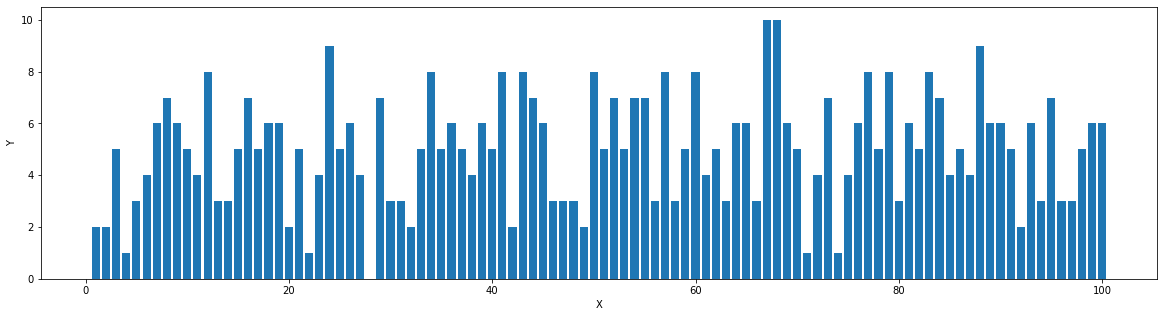

In [14]:
def drawPLT(list1):
    length=len(list1)
    list2 = list()
    for i in range(1, length+1):
        list2.append(i)
    plt.figure(figsize=(20,5))
    plt.bar(list2, list1)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    plt.close()

Game_Stats = Mafia_Game_withMedic_Stats(2, 7, 1)
drawPLT(Game_Stats)

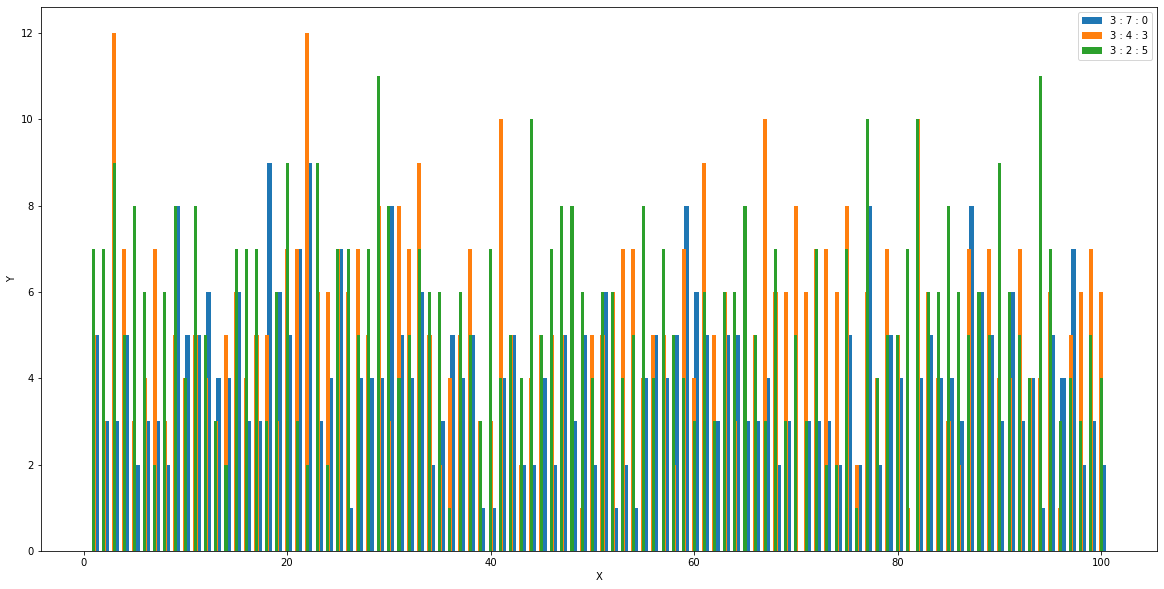

In [17]:
Game_Stats1 = Mafia_Game_withMedic_Stats(2, 8, 0)
Game_Stats2 = Mafia_Game_withMedic_Stats(2, 5, 3)
Game_Stats3 = Mafia_Game_withMedic_Stats(2, 3, 5)

list0 = list()
length = len(Game_Stats1)
for i in range(1, length+1):
    list0.append(i)
    
plt.figure(figsize=(20,10))
plt.bar(list0, Game_Stats1, width=0.5, align="edge", label="3 : 7 : 0")
plt.bar(list0, Game_Stats2, width=0.4, align="center", label="3 : 4 : 3")
plt.bar(list0, Game_Stats3, width=0.3, label="3 : 2 : 5")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
plt.close()

### Data Frame
- 메딕 3명을 포함한 전체 게임인원 100명 중 마피아의 비율(%)을 인덱스로 하여 확률을 나타냄

In [10]:
Game_participants=list()
col=["Citizens to Win(%)"]
Game = Mafia_Game_changewithMedic(0, 97, 3)
length=len(Game)
index = list()
for i in range(1, length+1):
    index.append(i)

df=pd.DataFrame(Game, index, columns=col)
df

,Citizens to Win(%)
1,77.0
2,52.0
3,23.0
4,17.0
5,10.0
6,2.0
7,2.0
8,1.0
9,0.0
10,0.0


### Histogram

- 메딕 3명을 포함한 전체 게임인원 각 10, 50, 100명
- x축은 마피아의 명 수, y축은 시민의 승률

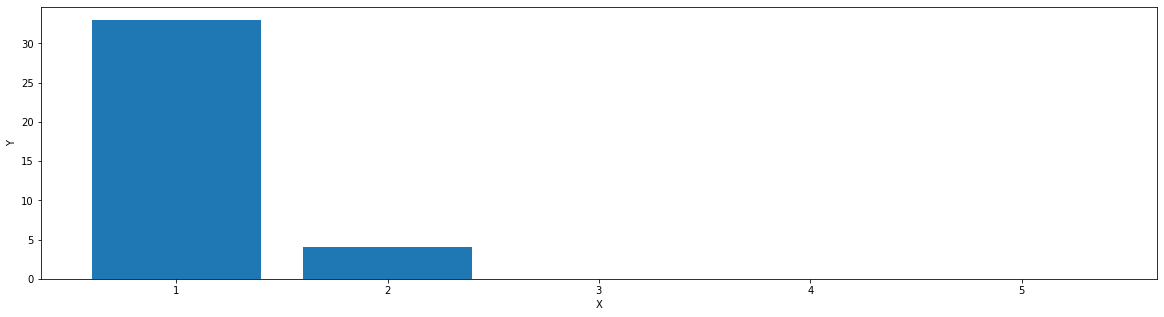

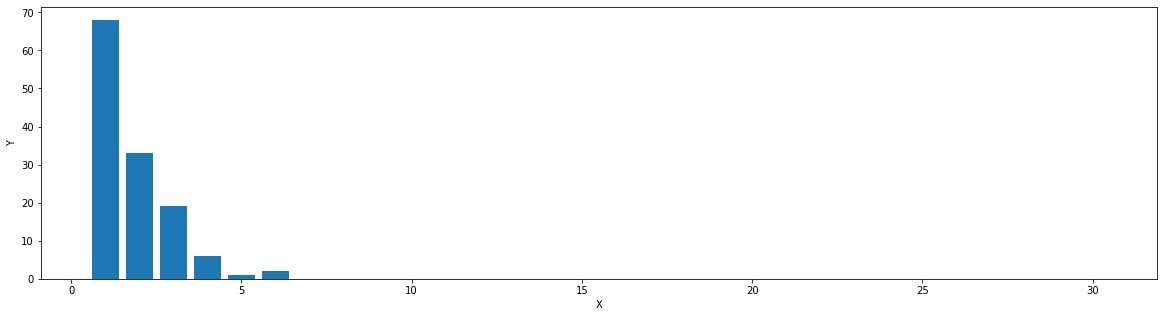

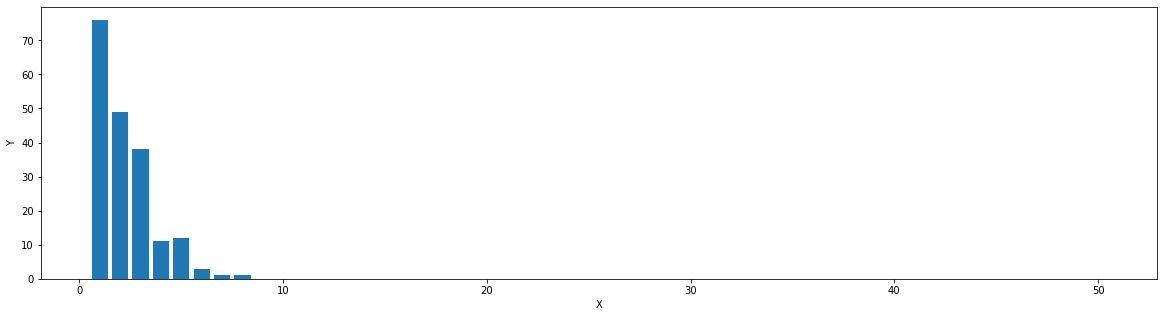

In [18]:
Game_Stats = Mafia_Game_changewithMedic(0, 7, 3)
drawPLT(Game_Stats)

Game_Stats = Mafia_Game_changewithMedic(0, 57, 3)
drawPLT(Game_Stats)

Game_Stats = Mafia_Game_changewithMedic(0, 97, 3)
drawPLT(Game_Stats)